In [1]:
#importing the neccessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#mounting on google drive

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
%cd gdrive/MyDrive/MainProject

/content/gdrive/MyDrive/MainProject


In [ ]:
!cat /proc/meminfo | grep 'MemAvailable\|MemFree\|Buffers\|^Cached'

MemFree:         8376572 kB
MemAvailable:   11836500 kB
Buffers:          347468 kB
Cached:          3271412 kB


In [ ]:
import gc
gc.collect()

31

In [ ]:
!cat /proc/meminfo | grep 'MemAvailable\|MemFree\|Buffers\|^Cached'

MemFree:         8505260 kB
MemAvailable:   11853956 kB
Buffers:          340008 kB
Cached:          3165648 kB


In [ ]:
# !pip install psutil

import psutil

ram_gb = psutil.virtual_memory().available / 1e9
print('Available RAM:', ram_gb, 'GB')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Available RAM: 12.133380096 GB


In [ ]:
# a = []
# while(1):
#     a.append('1')

In [ ]:
#reading and checking the basic structure of the data
data = pd.read_csv("train_new1.csv",encoding='latin-1')
data.head()

In [ ]:
# Dropping the redundant looking columns 
to_drop = ["id","qid1","qid2"]
data = data.drop(data[to_drop], axis=1)
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,no
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,no
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,no
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,no
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,no


In [ ]:
# using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     404290 non-null  object
 1   question2     404290 non-null  object
 2   is_duplicate  404290 non-null  object
dtypes: object(3)
memory usage: 9.3+ MB


In [ ]:
# statistical info of dataset
data.describe()

,question1,question2,is_duplicate
count,404290,404290,404290
unique,290457,299175,2
top,How do I improve my English speaking?,How can you look at someone's private Instagra...,no
freq,50,120,255027


In [ ]:
# # Mapping Values for labels  
# data['is_duplicate'] = data['is_duplicate'].map({'no': 0, 'yes': 1}) 
# data.head(8)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['is_duplicate']=le.fit_transform(data['is_duplicate'])

In [ ]:
data['is_duplicate'].unique()

array([0, 1])

In [ ]:
dup=data[data['is_duplicate']==1]
org=data[data['is_duplicate']==0]

In [ ]:
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Text(0, 0.5, 'Number of Data points')

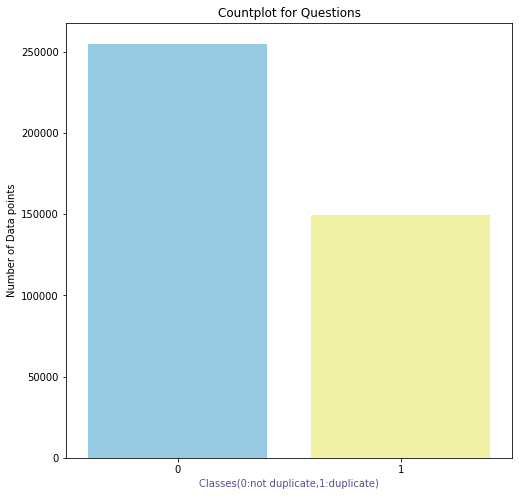

In [ ]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= data["is_duplicate"], palette= cols)
fg.set_title("Countplot for Questions")
fg.set_xlabel("Classes(0:not duplicate,1:duplicate)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [ ]:
#check duplicate
q_dup=data[data.duplicated()]
print(q_dup)

Empty DataFrame
Columns: [question1, question2, is_duplicate]
Index: []


In [ ]:
data.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
under_org=org.sample(149263,axis=0)

In [ ]:
under_org.shape

(149263, 3)

In [ ]:
balanced_data=pd.concat([dup,under_org])
balanced_data.shape

(298526, 3)

In [ ]:
balanced_data.is_duplicate.value_counts()

1    149263
0    149263
Name: is_duplicate, dtype: int64

In [ ]:
balanced_data.head(100)

,question1,question2,is_duplicate
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...
255,Will Modi win in 2019?,Can Narendra Modi become Prime Minister of Ind...,1
260,"What exactly is the ""Common Core Initiative/St...",What are the pros and cons of the Common Core ...,1
261,How do I choose a journal to publish my paper?,Where do I publish my paper?,1
262,What are your New Year's resolutions for 2017?,What is your creative New Year's resolution fo...,1


In [ ]:
balanced_data.tail()

,question1,question2,is_duplicate
227340,Why does Donald Trump call Hillary âcrookedâ?,Why do people say Hillary Clinton is a crook?,0
47379,How can one get a duplicate Income Tax Return ...,"After filing Income Tax returns, who will sign...",0
163969,How does whatsapp works?,How does WhatsApp last seen works?,0
89817,What is the equivalence of moroccan engineer d...,What is the equivalence of a Moroccan engineer...,0
268196,What does it really mean to tell someone you l...,When did you find out what it really means to ...,0


In [ ]:

# saving the dataframe
balanced_data.to_csv('balanced_data.csv',index=False)

In [7]:
balanced_data = pd.read_csv("balanced_data.csv",encoding='latin-1')

In [ ]:
balanced_data.head()

,question1,question2,is_duplicate
0,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
1,How can I be a good geologist?,What should I do to be a great geologist?,1
2,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
3,What can make Physics easy to learn?,How can you make physics easy to learn?,1
4,What was your first sexual experience like?,What was your first sexual experience?,1


Text(0, 0.5, 'Number of Data points')

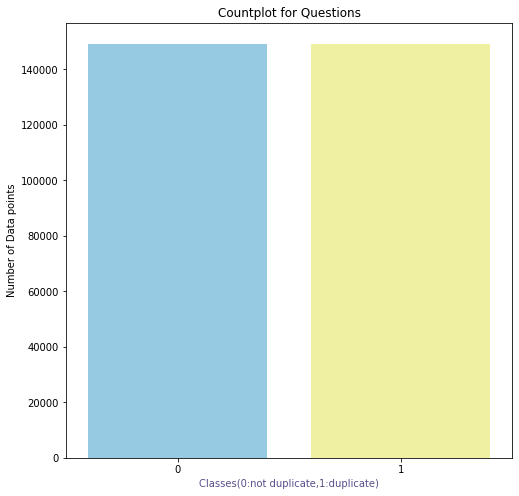

In [ ]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= balanced_data["is_duplicate"], palette= cols)
fg.set_title("Countplot for Questions")
fg.set_xlabel("Classes(0:not duplicate,1:duplicate)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [8]:
# split dataset
X = balanced_data.iloc[:, 0:2]
y = balanced_data.iloc[:, 2]

In [ ]:
X.head()

,question1,question2
0,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
1,How can I be a good geologist?,What should I do to be a great geologist?
2,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
3,What can make Physics easy to learn?,How can you make physics easy to learn?
4,What was your first sexual experience like?,What was your first sexual experience?


In [9]:

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
# libraries for performing NLP 

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# import spacy
# nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
# Cleaning the messages
def Cleaning(text):
  corpus = []
  wnl = WordNetLemmatizer()

  for question in list(text):

   # Cleaning special character from the questions
    quest = re.sub(pattern='[^a-zA-Z]', repl=' ', string=question)

   # Converting the entire question into lower case
    quest = quest.lower()

    # to remove numeric digits from string
    quest = ''.join([i for i in quest if not i.isdigit()])

    # Tokenizing the question by words
    words = word_tokenize(quest)
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word,'v') for word in filtered_words]

    # Joining the lemmatized words
    quest = ' '.join(lemmatized_words)

   # Building a corpus of question
    corpus.append(quest)
  return corpus


In [ ]:
xtestq1=Cleaning(X_test['question1'])
with open('xtestq1.pickle', 'wb') as f:
    pickle.dump(xtestq1, f)
len(xtestq1)


59706

In [ ]:
xtestq2=Cleaning(X_test['question2'])
with open('xtestq2.pickle', 'wb') as f:
    pickle.dump(xtestq2, f)
len(xtestq2)


59706

In [ ]:
xtrainq1=Cleaning(X_train['question1'])
with open('xtrainq1.pickle', 'wb') as f:
    pickle.dump(xtrainq1, f)
len(xtrainq1)


238820

In [ ]:
xtrainq2=Cleaning(X_train['question2'])
with open('xtrainq2.pickle', 'wb') as f:
    pickle.dump(xtrainq2, f)
len(xtrainq2)


238820

In [ ]:
merged_questions = xtrainq1 + xtrainq2
with open('merged_q.pickle', 'wb') as f:
    pickle.dump(merged_questions, f)

In [5]:
# Loading the xtestq1 from the pickle file
with open('xtestq1.pickle', 'rb') as f:
    xtestq1 = pickle.load(f)

# Loading the xtestq2 from the pickle file
with open('xtestq2.pickle', 'rb') as f:
    xtestq2 = pickle.load(f)

# Loading the xtrainq1 from the pickle file
with open('xtrainq1.pickle', 'rb') as f:
    xtrainq1 = pickle.load(f)

# Loading the xtrainq2 from the pickle file
with open('xtrainq2.pickle', 'rb') as f:
    xtrainq2 = pickle.load(f)

# Loading the xtrainq2 from the pickle file
with open('merged_q.pickle', 'rb') as f:
    merged_q = pickle.load(f)



In [ ]:
xtrainq1

In [ ]:
merged_q

In [ ]:
#length after cleaning
print("X_train1 =",len(xtrainq1)," ||","X_test1  =",len(xtestq1))
print("X_train2 =",len(xtrainq2)," ||","X_test2  =",len(xtestq2))
print("y_train  =",len(y_train)," ||","y_test   =",len(y_test))

X_train1 = 238820  || X_test1  = 59706
X_train2 = 238820  || X_test2  = 59706
y_train  = 238820  || y_test   = 59706


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
#fitting tokenizer on full questions
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(merged_q)

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
word_index = tokenizer.word_index

In [10]:

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [11]:
#tokenizing train questions
tokenized_train1 = tokenizer.texts_to_sequences(xtrainq1)
tokenized_train2 = tokenizer.texts_to_sequences(xtrainq2)

#tokenizing test questions
tokenized_test1 = tokenizer.texts_to_sequences(xtestq1)
tokenized_test2 = tokenizer.texts_to_sequences(xtestq2)

#checking max_length and vocab size
max_len = max(len(seq) for seq in tokenized_train1 + tokenized_train2)
print('Maximum sequence length:', max_len)
vocab_size = len(tokenizer.word_index) + 1
print("tokenizer vocab size-",vocab_size)

     


Maximum sequence length: 94
tokenizer vocab size- 51844


In [12]:
#padding tokenized  train data
maxlen = 100
X_train1 = pad_sequences(tokenized_train1, maxlen=maxlen,padding='post')
X_train2 = pad_sequences(tokenized_train2, maxlen=maxlen,padding='post')

#padding tokenized test data
X_test1 = pad_sequences(tokenized_test1, maxlen=maxlen,padding='post')
X_test2 = pad_sequences(tokenized_test2, maxlen=maxlen,padding='post')


In [ ]:
#path to glove embedding 
glove = "glove.6B.300d.txt"

In [ ]:
#glove embedding in a dictionary - embedding
def glove_embedding(filename):  
    file = open(filename,'r')
    lines = file.readlines()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:],dtype='float32')
    print("Found %s word vectors." % len(embedding))    
    return(embedding)
 

In [ ]:
#embedding matrix - 2D array -300 dimensions of each word -glove.6B.300d.txt

def embedding_matrix(vocabulary,embedd):  
    hits = 0
    misses = 0
    vocab_size = len(vocabulary)+1
    weight_matrix = np.zeros((vocab_size,300)) 
    
    for word , i in vocabulary.items():
        vector = embedd.get(word)
        if vector is not None:
            weight_matrix[i] = vector
            hits += 1
        else:
           misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))        
    return(weight_matrix)

In [ ]:
#Glove embedding 
embedd = glove_embedding(glove)
embedding_vectors = embedding_matrix(tokenizer.word_index,embedd)

In [ ]:
# Save embedding weights to a file
np.save("embedding_weights.npy", embedding_vectors)
print("Embedding weights saved successfully!")



Embedding weights saved successfully!


In [ ]:
# Load the saved embedding matrix
embedding_matrix = np.load('embedding_weights.npy')

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Lambda, Dense,Bidirectional,GRU,GlobalMaxPool1D
from keras.layers import Dropout
from keras import backend as K
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Lambda, Embedding, Dropout,Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adadelta
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Concatenate
from keras import regularizers
from keras.layers import concatenate
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import cosine_similarity
from tensorflow.keras.layers import Reshape




In [14]:



def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """
        y_true = tf.cast(y_true, tf.float32)
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss


    
    
    
    

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Lambda, Dense
from keras.layers import Dropout
from keras import backend as K
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


# Set hyperparameters
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 300
LSTM_UNITS = 128
# tf.random.set_seed(1)  # set the random seed

# Define input layers
input_1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define shared embedding layer
# embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
#                             output_dim=EMBEDDING_DIM,
#                             weights=[embedding_matrix],
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=True)
embedding_layer=(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))


# Define shared LSTM layer with dropout and L2 regularization
lstm_layer = Bidirectional(LSTM(units=LSTM_UNITS, dropout=0.2, 
                  kernel_regularizer=regularizers.l2(0.001)))


# Connect input to embedding and LSTM layers
embedded_1 = embedding_layer(input_1)
embedded_2 = embedding_layer(input_2)
encoded_1 = lstm_layer(embedded_1)
encoded_2 = lstm_layer(embedded_2)

# # Define distance measure (use Manhattan distance)
# distance = Lambda(lambda x: K.abs(x[0] - x[1]))

# # Define distance measure (use Euclidean distance)
# distance = Lambda(lambda x: K.sqrt(K.sum(K.square(x[0] - x[1]), axis=1, keepdims=True) + K.epsilon()))

# Define cosine similarity measure
similarity = Lambda(lambda x: cosine_similarity(x[0], x[1]))

# Connect the encoded inputs to the similarity measure
similarity_output = similarity([encoded_1, encoded_2])
similarity_output = Reshape((1,))(similarity_output)

# # Connect the encoded inputs to the distance measure
# distance_output = distance([encoded_1, encoded_2])

# Add a dense layer with a sigmoid activation to produce the similarity score
output = Dense(units=1, activation='sigmoid')(similarity_output)

# Define the model with the two inputs and the similarity score output
model = Model(inputs=[input_1, input_2], outputs=output)

early_stopping = EarlyStopping(
    monitor='val_loss', # The metric to monitor
    mode='min', # Whether the metric should be minimized or maximized
    patience=5, # Number of epochs with no improvement after which training will be stopped
    verbose=1, # Whether to print out messages for early stopping
    restore_best_weights=True
)
best_model = ModelCheckpoint(
    'best_sim.h5', # Path to save the best model
    save_best_only=True, # Whether to save only the best model or all models
    save_weights_only=False, # Whether to save only the weights or the entire model
    monitor='val_loss', # The metric to monitor for saving the best model
    mode='min' # Whether the metric should be minimized or maximized
)


rms = RMSprop()
margin=1
model.compile(loss=loss(margin=margin), optimizer=rms, metrics=METRICS)


# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 300)     15553200    ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 256)         439296      ['embedding_1[0][0]',      

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
history = model.fit([X_train1, X_train2], y_train, 
                    epochs=5, batch_size=64, 
                    validation_data=([X_test1, X_test2], y_test),
                    callbacks=[early_stopping, best_model])

Epoch 1/5
3732/3732 [==============================] - 134s 34ms/step - loss: 0.2359 - accuracy: 0.6223 - precision: 0.5878 - recall: 0.8190 - val_loss: 0.2501 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
3732/3732 [==============================] - 125s 34ms/step - loss: 0.2432 - accuracy: 0.5603 - precision: 0.5455 - recall: 0.7220 - val_loss: 0.2135 - val_accuracy: 0.6936 - val_precision: 0.6649 - val_recall: 0.7806
Epoch 3/5
3732/3732 [==============================] - 124s 33ms/step - loss: 0.1985 - accuracy: 0.7164 - precision: 0.6747 - recall: 0.8361 - val_loss: 0.1879 - val_accuracy: 0.7371 - val_precision: 0.6955 - val_recall: 0.8435
Epoch 4/5
3732/3732 [==============================] - 123s 33ms/step - loss: 0.1857 - accuracy: 0.7389 - precision: 0.6958 - recall: 0.8487 - val_loss: 0.1815 - val_accuracy: 0.7489 - val_precision: 0.7116 - val_recall: 0.8373
Epoch 5/5
3732/3732 [==============================] - 124s 33ms/step - loss: 0.

In [19]:
# Save the history object to disk
with open('hconlossbisilstm.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# # Load the history object from disk
# with open('history.pkl', 'rb') as f:
#     history = pickle.load(f)

In [ ]:
# tf.keras.utils.plot_model(base_network, show_shapes=True)

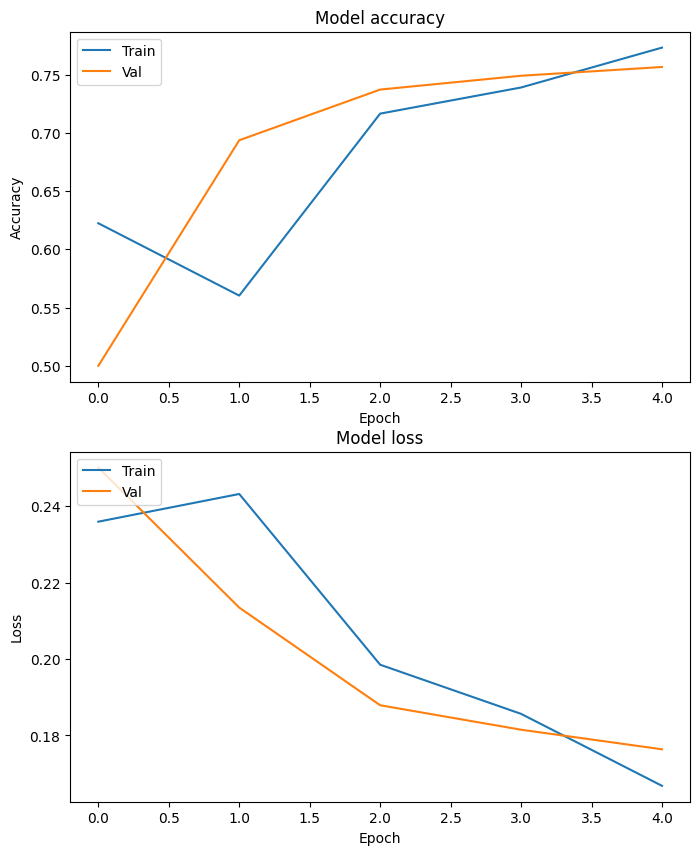

In [20]:
# # save the model and weights
model.save('1conlossbisilstm.h5')


import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

# Plot the loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

# Display the plot
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = model.predict([X_test1, X_test2])

# Convert predicted probabilities to binary labels
y_pred = np.round(y_pred)
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


1866/1866 [==============================] - 16s 8ms/step
Test accuracy: 0.7564566375238669
              precision    recall  f1-score   support

           0       0.81      0.67      0.73     29853
           1       0.72      0.84      0.78     29853

    accuracy                           0.76     59706
   macro avg       0.76      0.76      0.75     59706
weighted avg       0.76      0.76      0.75     59706



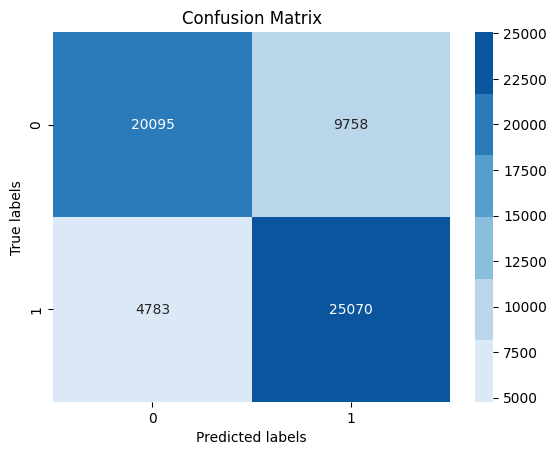

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a colormap
cmap = sns.color_palette("Blues")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g')


# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [24]:
#for dataframe 
import pandas as pd

def predict_similaritydf(df, model, tokenizer):
    # Clean the question1 using Cleaning function
    q1_cleaned = Cleaning(df['question1'])
    #Clean question2
    q2_cleaned = Cleaning(df['question2'])

    similarity_probs = []
    similarity_labels = []
    tup_q=zip(q1_cleaned, q2_cleaned)

    for q11, q22 in tup_q:
        
        # Tokenize the questions and convert to sequences
        q1_seq = tokenizer.texts_to_sequences([q11])
        q2_seq = tokenizer.texts_to_sequences([q22])
     
        # Pad sequences to be of the same length
        max_length = 100
        q1_padded = pad_sequences(q1_seq, maxlen=max_length, padding='post', truncating='post')
        q2_padded = pad_sequences(q2_seq, maxlen=max_length, padding='post', truncating='post')

        # Make prediction using the loaded model
        similarity_prob = model.predict([q1_padded, q2_padded])[0][0]
        similarity_probs.append(similarity_prob)

        # Determine similarity label based on threshold
        threshold=0.5
        if similarity_prob >= threshold:
            similarity_label = "similar"
        else:
            similarity_label = "not similar"
        similarity_labels.append(similarity_label)

    # Create a new column in the dataframe to store the similarity probabilities
    df['similarity_prob'] = similarity_probs
    df['similarity_label'] = similarity_labels
    return df


In [25]:
# Example dataframe
df = pd.DataFrame({
    'question1': ['How do you make a cup of coffee?','what is your favourite day','what is the difference between artifical neurons and biological neurons','What can make Physics easy to learn?','What is the capital of France?', 'What is the meaning of life?','Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'],
    'question2': ['What is the process of brewing coffee?','what is your favourite season','why the human brains are so efficient rather than machines','How can you make physics easy to learn?','What is the capital of Spain?', 'What is the purpose of existence?','I/m a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?']
})


In [29]:
predicted_df = predict_similaritydf(df, model, tokenizer)



1/1 [==============================] - 0s 27ms/step


In [31]:
predicted_df.head(100)

,question1,question2,similarity_prob,similarity_label
0,How do you make a cup of coffee?,What is the process of brewing coffee?,0.686026,similar
1,what is your favourite day,what is your favourite season,0.757344,similar
2,what is the difference between artifical neuro...,why the human brains are so efficient rather t...,0.212422,not similar
3,What can make Physics easy to learn?,How can you make physics easy to learn?,0.801095,similar
4,What is the capital of France?,What is the capital of Spain?,0.143700,not similar
5,What is the meaning of life?,What is the purpose of existence?,0.722602,similar
6,Astrology: I am a Capricorn Sun Cap moon and c...,"I/m a triple Capricorn (Sun, Moon and ascendan...",0.483456,not similar
